In [61]:
import pandas
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot

In [62]:
data={
    'Title':[
        'Movie A','Movie B','Movie C','Movie D','Movie E',
        'Movie F','Movie G','Movie H','Movie I','Movie J'
    ],
    'Duration':[90,95,150,160,170,200,100,105,110,210],
    'Rating':[7.0,6.8,8.5,8.7,8.6,9.0,6.5,6.7,6.9,9.1],
    'Year':[2000,2002,2010,2011,2012,2015,2003,2005,2006,2016]
}

In [63]:
df=pandas.DataFrame(data)
print('Original data without clusters')
print(df)

Original data without clusters
     Title  Duration  Rating  Year
0  Movie A        90     7.0  2000
1  Movie B        95     6.8  2002
2  Movie C       150     8.5  2010
3  Movie D       160     8.7  2011
4  Movie E       170     8.6  2012
5  Movie F       200     9.0  2015
6  Movie G       100     6.5  2003
7  Movie H       105     6.7  2005
8  Movie I       110     6.9  2006
9  Movie J       210     9.1  2016


In [64]:
X=df[['Duration','Rating','Year']]

In [65]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [69]:
db=DBSCAN(eps=1.0,min_samples=2)
df['Cluster']=db.fit_predict(X_scaled)

In [70]:
print('Clustered values')
print(df)

Clustered values
     Title  Duration  Rating  Year  Cluster
0  Movie A        90     7.0  2000        0
1  Movie B        95     6.8  2002        0
2  Movie C       150     8.5  2010        1
3  Movie D       160     8.7  2011        1
4  Movie E       170     8.6  2012        1
5  Movie F       200     9.0  2015        1
6  Movie G       100     6.5  2003        0
7  Movie H       105     6.7  2005        0
8  Movie I       110     6.9  2006        0
9  Movie J       210     9.1  2016        1


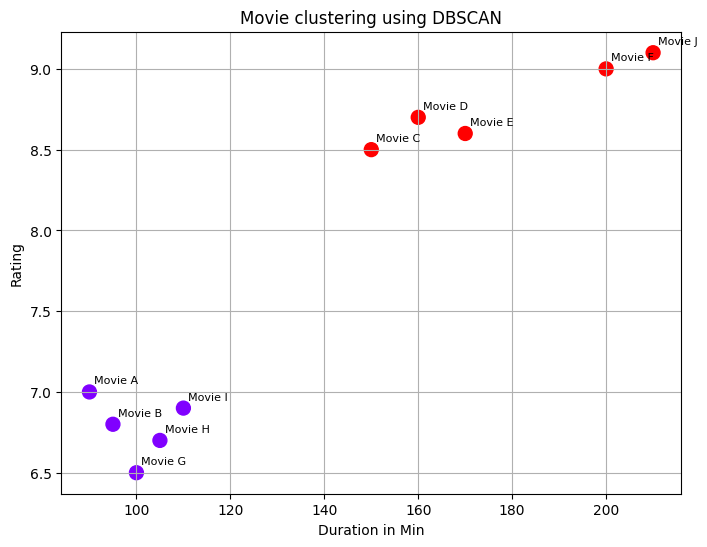

In [71]:
pyplot.figure(figsize=(8,6))
pyplot.scatter(df['Duration'],df['Rating'],c=df['Cluster'],cmap='rainbow',s=100)
pyplot.xlabel('Duration in Min')
pyplot.ylabel('Rating')
pyplot.title('Movie clustering using DBSCAN')
for i,title in enumerate(df['Title']):
  pyplot.annotate(title,(df['Duration'][i]+1,df['Rating'][i]+0.05),fontsize=8)

pyplot.grid(True)
pyplot.show()

In [72]:
print(df.sort_values('Cluster'))

     Title  Duration  Rating  Year  Cluster
0  Movie A        90     7.0  2000        0
1  Movie B        95     6.8  2002        0
6  Movie G       100     6.5  2003        0
7  Movie H       105     6.7  2005        0
8  Movie I       110     6.9  2006        0
3  Movie D       160     8.7  2011        1
5  Movie F       200     9.0  2015        1
2  Movie C       150     8.5  2010        1
4  Movie E       170     8.6  2012        1
9  Movie J       210     9.1  2016        1


**Based on a CSV dataset**

In [73]:
df1=pandas.read_csv("https://raw.githubusercontent.com/sohamglobal/datasets/refs/heads/main/movies_clusters.csv")
print(df)


     Title  Duration  Rating  Year  Cluster
0  Movie A        90     7.0  2000        0
1  Movie B        95     6.8  2002        0
2  Movie C       150     8.5  2010        1
3  Movie D       160     8.7  2011        1
4  Movie E       170     8.6  2012        1
5  Movie F       200     9.0  2015        1
6  Movie G       100     6.5  2003        0
7  Movie H       105     6.7  2005        0
8  Movie I       110     6.9  2006        0
9  Movie J       210     9.1  2016        1


In [74]:
X1=df1[['duration','rating','release_year']]

In [75]:
scaler=StandardScaler()
X1_scaled=scaler.fit_transform(X1)

In [76]:
db=DBSCAN(eps=1.2,min_samples=2)
df1['Cluster']=db.fit_predict(X1_scaled)

In [77]:
print(df1)

         movie_name  duration  rating  release_year  Cluster
0   The Dark Knight       152     9.0          2008        0
1         Inception       150     8.9          2009        0
2      Interstellar       168     8.7          2014        0
3      The Prestige       130     8.5          2006        1
4  Avengers Endgame       180     8.4          2019        0
5            Avatar       162     7.9          2009       -1
6           Titanic       195     7.8          1997       -1
7         Toy Story        81     8.3          1995       -1
8      Finding Nemo       100     8.2          2003        1
9             Shrek        90     7.9          2001        1
